In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
#definition of numerical parameters
t=20. #h
K=100
dt=float(t)/float(K-1)
t_grid=np.array([k*dt for k in range(K)])
L=1. #m
I=100
dL=float(L)/float(I-1)
L_grid=np.array([i*dL for i in range(I)])


In [3]:
v=10. #m/h
e0=0.4
ps=0.95
ds=1.4 #mm
rs=1000000. #g/m3
a=0.1
c1=1.145
c2=0.45
c3=1.2*10**(-3)
c4=0.2
su=1000. #g/m3
x=1.5
y=0.75
S=6*(1-e0)/ps/ds
z=c2*S**0.61/(v**0.24)             
l0v=c1*S**1.35/(v**0.25)
b=a/(S**0.65)

In [4]:
f=lambda c,s:-dL*(l0v*((1+b*(s/(rs*c3*c4*v))/e0)**x)*((1-(s/(rs*c3*c4*v))/e0)**y)*((1-s/su/v)**z))*c
g=lambda c,s:dt*v*(l0v*((1+b*(s/(rs*c3*c4*v))/e0)**x)*((1-(s/(rs*c3*c4*v))/e0)**y)*((1-s/su/v)**z))*c


In [5]:
#Initial Condition
C=np.array([50 for k in range(0,K)])
Sgm=np.array([0 for i in range(0,I)])


In [6]:
#define matrices 
A_c = np.diagflat([-0.000001]+[-1 for k in range(K-2)]+[-0.000001]) +\
      np.diagflat([1. for k in range(K-1)], 1)
B_c = np.diagflat([0 for k in range(K)])
A_s = np.diagflat([0.000001]+[1. for i in range(I-2)]+[0.000001])
B_s= np.diagflat([1. for i in range(I)])
print(A_c)
print(A_s)

[[-1.e-06  1.e+00  0.e+00 ...  0.e+00  0.e+00  0.e+00]
 [ 0.e+00 -1.e+00  1.e+00 ...  0.e+00  0.e+00  0.e+00]
 [ 0.e+00  0.e+00 -1.e+00 ...  0.e+00  0.e+00  0.e+00]
 ...
 [ 0.e+00  0.e+00  0.e+00 ... -1.e+00  1.e+00  0.e+00]
 [ 0.e+00  0.e+00  0.e+00 ...  0.e+00 -1.e+00  1.e+00]
 [ 0.e+00  0.e+00  0.e+00 ...  0.e+00  0.e+00 -1.e-06]]
[[1.e-06 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e+00 ... 0.e+00 0.e+00 0.e+00]
 ...
 [0.e+00 0.e+00 0.e+00 ... 1.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 1.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 0.e+00 1.e-06]]


In [7]:
f=lambda c,s:-dL*(l0v*((1+b*(s/(rs*c3*c4*v))/e0)**x)*((1-(s/(rs*c3*c4*v))/e0)**y)*((1-s/su/v)**z))*c

In [8]:
#Define a vectorial version
f_vec = lambda C, Sgm: np.multiply(-dL, np.multiply(np.multiply(np.multiply(np.multiply(l0v,np.power(np.add(np.multiply(np.divide
                       (np.divide(Sgm,np.multiply(np.multiply(np.multiply(rs,c3),c4),v)),e0),b),1),x)),np.power(np.subtract(1,np.divide
                       (np.divide(Sgm,np.multiply(np.multiply(np.multiply(rs,c3),c4),v)),e0)),y)),np.power(np.subtract(1,np.divide(np.divide
                       (Sgm,su),v)),z)),C))



In [9]:
g=lambda c,s:dt*v*(l0v*((1+b*(s/(rs*c3*c4*v))/e0)**x)*((1-(s/(rs*c3*c4*v))/e0)**y)*((1-s/su/v)**z))*c

In [10]:
#Define a vectorial version
g_vec = lambda C, Sgm: np.multiply(dt, np.multiply(v,np.multiply(np.multiply(np.multiply(np.multiply(l0v,np.power(np.add(np.multiply(np.divide
                       (np.divide(Sgm,np.multiply(np.multiply(np.multiply(rs,c3),c4),v)),e0),b),1),x)),np.power(np.subtract(1,np.divide
                       (np.divide(Sgm,np.multiply(np.multiply(np.multiply(rs,c3),c4),v)),e0)),y)),np.power(np.subtract(1,np.divide(np.divide
                       (Sgm,su),v)),z)),C)))

In [11]:
print (f(C[0], Sgm[0]))

-1.247236917227552


In [12]:
print (f(C[-1], Sgm[-1]))

-1.247236917227552


In [13]:
print (f_vec(C, Sgm))

[-1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692
 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692
 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692
 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692
 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692
 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692
 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692
 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692
 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692
 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692
 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692
 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692
 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1.24723692
 -1.24723692 -1.24723692 -1.24723692 -1.24723692 -1

In [14]:
#Find solutions
C_record = []
Sgm_record = []

C_record.append(C)
Sgm_record.append(Sgm)

for k in range(K):
    Sgm_new = np.linalg.solve(A_s, B_s.dot(Sgm)+g_vec(C,Sgm))
for i in range(I):
    C_new = np.linalg.solve(A_c,B_c.dot(C)+f_vec(C,Sgm))
    
C = C_new
Sgm = Sgm_new
                                                                                                                                                     

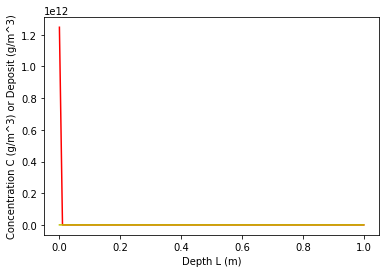

In [15]:
plt.plot(L_grid, C,'r')
plt.plot(L_grid, Sgm,'y')
plt.xlabel('Depth L (m)')
plt.ylabel('Concentration C (g/m^3) or Deposit (g/m^3)')
plt.show()

In [16]:
#definition of numerical parameters
t=20. #h
K=100
dt=float(t)/float(K-1)
t_grid=np.array([k*dt for k in range(K)])
L=1. #m
I=100
dL=float(L)/float(I-1)
L_grid=np.array([i*dL for i in range(I)])

In [17]:
v=10. #m/h
e0=0.4
ps=0.95
ds=1.4 #mm
rs=1000000. #g/m3
a=0.1
c1=1.145
c2=0.45
c3=1.2*10**(-3)
c4=0.2
su=1000. #g/m3
x=1.5
y=0.75
S=6*(1-e0)/ps/ds
z=c2*S**0.61/(v**0.24)             
l0v=c1*S**1.35/(v**0.25)
b=a/(S**0.65)
nplot = 20

In [18]:
#initialize matrices A, B and f arrays
A_c = np.zeros((K-2,K-2))
B_c = np.zeros((K-2,K-2))
f = np.zeros((K-2))
#define matrices 
for l in range(K-2):
    if l==0:
        A_c[l,:] = [1 if k==0 else -1 if k==1 else 0 for k in range(K-2)]
        f[l] = 50. 
    elif l==K-3:
        A_c[l,:] = [ 1 if k==K-3 else 0 for k in range(K-2)]
        f[l] = 0. 
    else:
        A_c[l,:] = [-1 if k==l+1 else 1 if k==l else 0 for k in range(K-2)]
        
print (A_c)
print (B_c)

#initialize matrices A, B and g arrays
A_s = np.zeros((I-2,I-2))
B_s = np.zeros((I-2,I-2))
g = np.zeros((I-2))
#define matrices 
for m in range(I-2):
    if m==0:
        A_s[m,:] = [1 if i==0 else 0 for i in range(I-2)]
        B_s[m,:] = [1 if i==0 else 0 for i in range(I-2)]
        g[m] = 0. 
    elif m==I-3:
        A_s[m,:] = [0 if i==I-4 else 1 if i==I-3 else 0 for i in range(I-2)]
        B_s[m,:] = [0 if i==I-4 else 1 if i==I-3 else 0 for i in range(I-2)]
        g[m] = 0. 
    else:
        A_s[m,:] = [0 if i==m+1 or i==m-1 else 1 if i==m else 0 for i in range(I-2)]
        B_s[m,:] = [0 if i==m+1 or i==m-1 else 1 if i==m else 0 for i in range(I-2)]
        
print (A_s)
print (B_s)

[[ 1. -1.  0. ...  0.  0.  0.]
 [ 0.  1. -1. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1. -1.  0.]
 [ 0.  0.  0. ...  0.  1. -1.]
 [ 0.  0.  0. ...  0.  0.  1.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


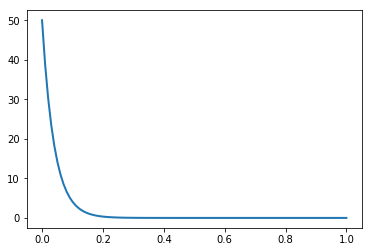

In [19]:
#initialize grid
l_step = np.linspace(0,1,K)
#initial condition
c= np.asarray([50 if l==0 else 0 if l==1 else 50*np.exp(-25*l) for l in l_step ])
#evaluate right hand side at t=0
bb = A_c.dot(c[1:-1]) + b

fig = plt.figure()
plt.plot(l_step,c,linewidth=2)

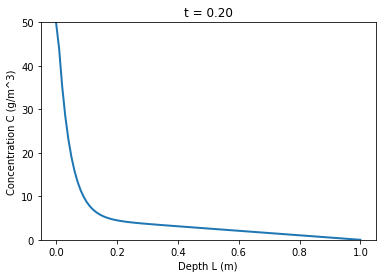

1


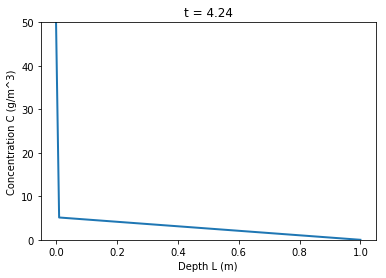

2


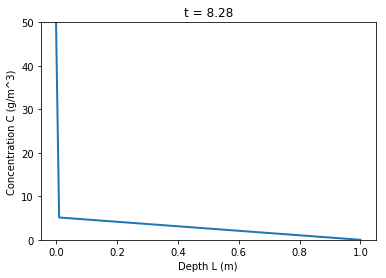

3


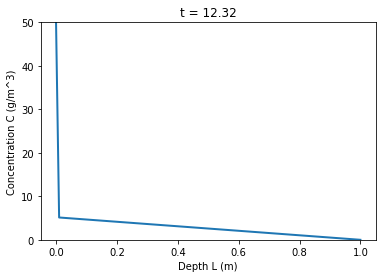

4


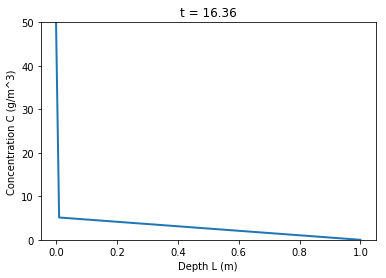

5


In [20]:
w = 0
for j in range(I):
    
    #find solution inside domain
    c[1:-1] = np.linalg.solve(A_c,bb)
    bb = B_c.dot(c[1:-1]) + b
    if(j%nplot==0): #plot results every nplot timesteps
        plt.plot(l_step,c,linewidth=2)
        plt.ylim([0,50])
        plt.xlabel('Depth L (m)')
        plt.ylabel('Concentration C (g/m^3)')
        plt.title("t = %2.2f"%(dt*(j+1)))
        w += 1
        plt.show()
        print(w)